In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [590]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36 Edg/127.0.0.0'}
url = "https://www.zomato.com/bangalore/restaurants/burger?category=1"
response=requests.get(url,headers=headers)

In [591]:
soup = BeautifulSoup(response.content, 'lxml')

In [592]:
menuItems = [i.get_text() for i in soup.findAll('h4')]
menuItems = pd.Series(menuItems)
menuItems

0                   Omleterian
1                  Burger King
2          Shivalli Restaurant
3     Kolkata Famous Kati Roll
4                   McDonald's
5                      Gochick
6                       EatFit
7    WOW! Chicken by WOW! Momo
8                          KFC
dtype: object

In [452]:
allImage = soup.findAll('img', alt='Restaurant Card')
allImage  
''' 
    Images are lazy loaded in zomato so we are not able to obtain the src link..
    lazy loaded items cannot be fetched using beautifulSoup we need to go with selenium
    And as data is loaded on scroll dynamically so we can fetch only limited content using beautiful soup
'''

[<img alt="Restaurant Card" class="sc-s1isp7-5 cqxheR" loading="lazy" src=""/>,
 <img alt="Restaurant Card" class="sc-s1isp7-5 cqxheR" loading="lazy" src=""/>,
 <img alt="Restaurant Card" class="sc-s1isp7-5 cqxheR" loading="lazy" src=""/>,
 <img alt="Restaurant Card" class="sc-s1isp7-5 cqxheR" loading="lazy" src=""/>,
 <img alt="Restaurant Card" class="sc-s1isp7-5 cqxheR" loading="lazy" src=""/>,
 <img alt="Restaurant Card" class="sc-s1isp7-5 cqxheR" loading="lazy" src=""/>,
 <img alt="Restaurant Card" class="sc-s1isp7-5 cqxheR" loading="lazy" src=""/>,
 <img alt="Restaurant Card" class="sc-s1isp7-5 cqxheR" loading="lazy" src=""/>,
 <img alt="Restaurant Card" class="sc-s1isp7-5 cqxheR" loading="lazy" src=""/>]

In [476]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36 Edg/127.0.0.0'}
res = requests.get('https://www.timesnownews.com/sports')

In [478]:
soup = BeautifulSoup(res.content, 'lxml')

In [538]:
div = soup.findAll(class_='w4ga Y-nh')
images = [ ]
for i in div:
    images.extend(i.findAll('img'))
images

[<img alt="Not Virat Kohli Rohit Sharma Names His Three Pillars Credits Trio For T20 World Cup Triumph" class="lazy" data-placeholder="https://static.tnn.in/thumb/msid-88386381,width-540,height-303,false/88386381.jpg?quality=100" data-src="https://static.tnn.in/thumb/msid-112690799,thumbsize-363550,width-540,height-303,false/112690799.jpg?quality=100" loading="lazy" src="https://static.tnn.in/thumb/msid-88386381,width-540,height-303,false/88386381.jpg?quality=100" title=""/>,
 <img alt="RG Kar Horror Sourav Ganguly Joins Protest March In Kolkata Lights Candle Demanding Justice For Victim- WATCH" class="lazy" data-placeholder="https://static.tnn.in/thumb/msid-88386381,width-540,height-303,false/88386381.jpg?quality=100" data-src="https://static.tnn.in/thumb/msid-112689437,thumbsize-35140,width-540,height-303,false/112689437.jpg?quality=100" loading="lazy" src="https://static.tnn.in/thumb/msid-88386381,width-540,height-303,false/88386381.jpg?quality=100" title=""/>,
 <img alt="Mohammed S

In [580]:
imagelinks = []
for i in images:
    imagelinks.append(i.attrs['data-src'])
imagelinks[:5]

['https://static.tnn.in/thumb/msid-112690799,thumbsize-363550,width-540,height-303,false/112690799.jpg?quality=100',
 'https://static.tnn.in/thumb/msid-112689437,thumbsize-35140,width-540,height-303,false/112689437.jpg?quality=100',
 'https://static.tnn.in/thumb/msid-112687293,thumbsize-27886,width-540,height-303,false/112687293.jpg?quality=100',
 'https://static.tnn.in/thumb/msid-112690769,thumbsize-45910,width-135,height-76,false/112690769.jpg?quality=100',
 'https://static.tnn.in/thumb/msid-112686887,thumbsize-83260,width-135,height-76,false/112686887.jpg?quality=100']

112690799.jpg


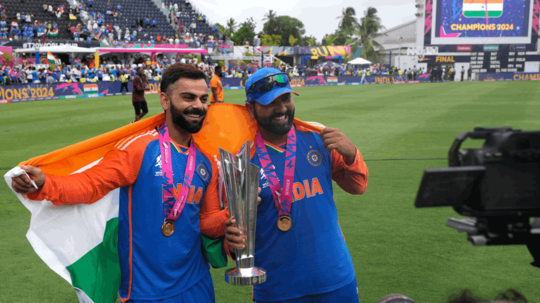

112689437.jpg


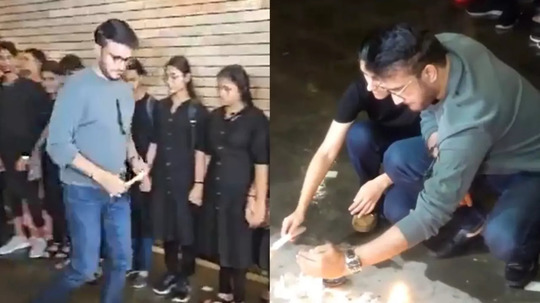

112687293.jpg


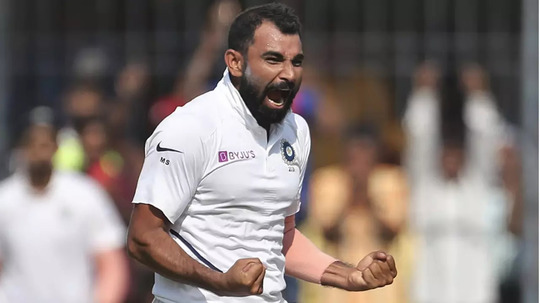

112690769.jpg


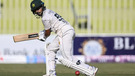

112686887.jpg


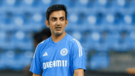

112689059.jpg


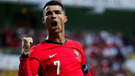

112695640.jpg


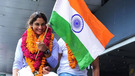

112689906.jpg


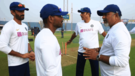

112680151.jpg


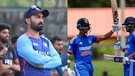

112687364.jpg


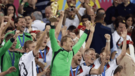

112682636.jpg


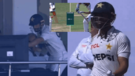

112686299.jpg


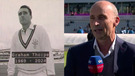

112685069.jpg


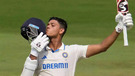

112687224.jpg


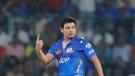

112687760.jpg


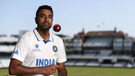

112687989.jpg


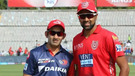

112689464.jpg


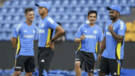

112689946.jpg


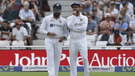

112668661.jpg


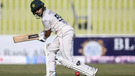

112679613.jpg


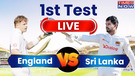

112682305.jpg


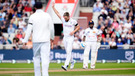

112680973.jpg


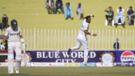

112681377.jpg


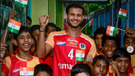

112677640.jpg


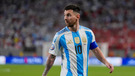

112691009.jpg


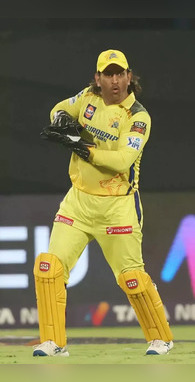

112690581.jpg


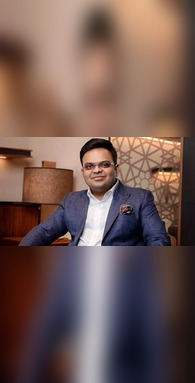

112690328.jpg


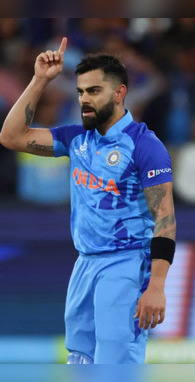

112688040.jpg


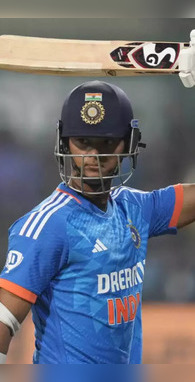

112696103.jpg


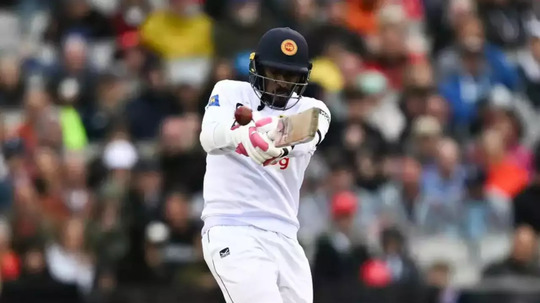

112695693.jpg


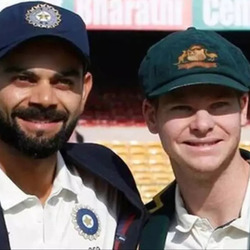

112695475.jpg


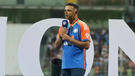

112690769.jpg


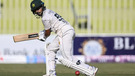

112690799.jpg


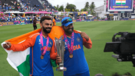

112671579.jpg


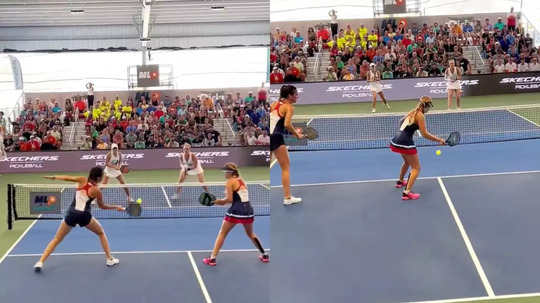

112661425.jpg


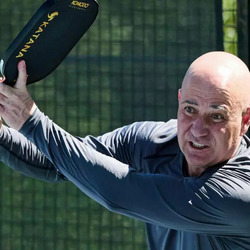

112635502.jpg


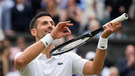

112538665.jpg


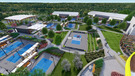

112505337.jpg


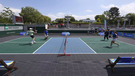

112691681.jpg


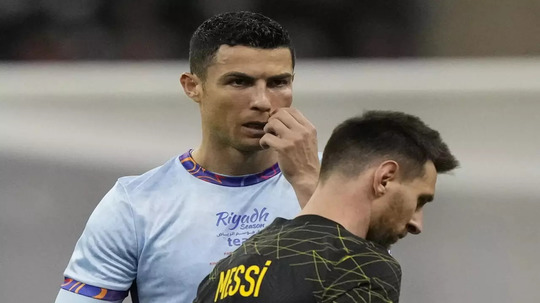

112689059.jpg


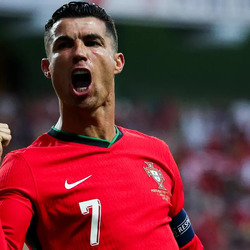

112687364.jpg


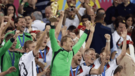

112681377.jpg


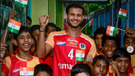

112680560.jpg


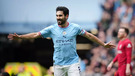

112661246.jpg


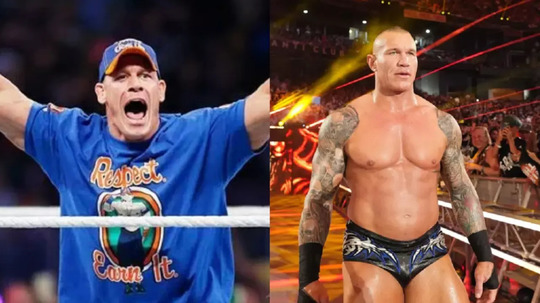

112620711.jpg


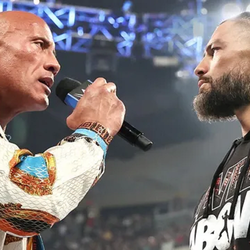

112608837.jpg


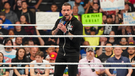

112607670.jpg


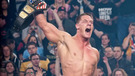

112593923.jpg


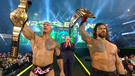

112659861.jpg


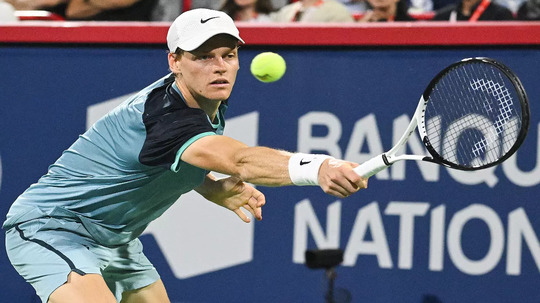

112648960.jpg


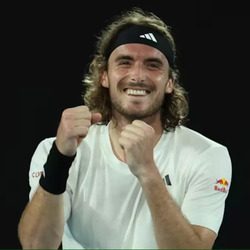

112643491.jpg


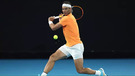

112586262.jpg


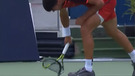

112353623.jpg


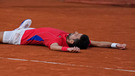

112673964.jpg


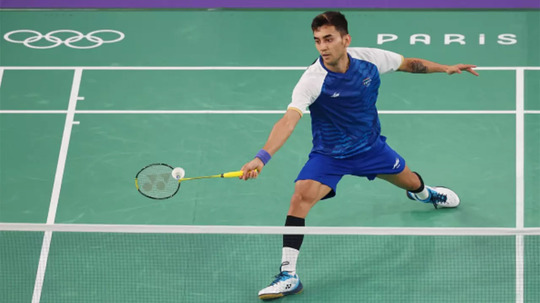

112558198.jpg


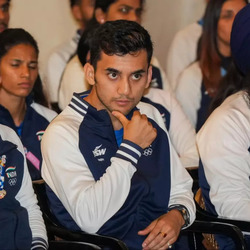

112499791.jpg


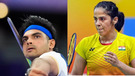

112492451.jpg


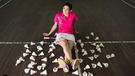

112483553.jpg


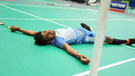

112690972.jpg


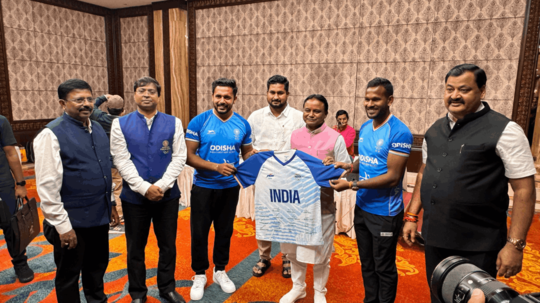

112689795.jpg


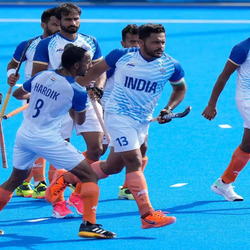

112580820.jpg


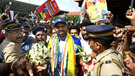

112555563.jpg


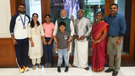

112547624.jpg


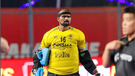

112676724.jpg


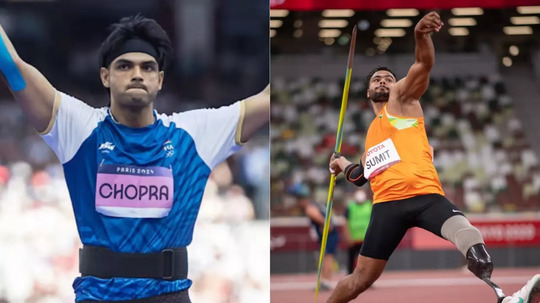

112667301.jpg


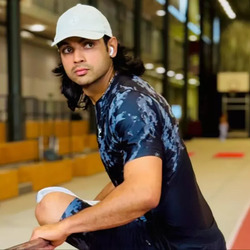

112662798.jpg


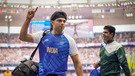

112658258.jpg


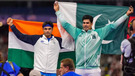

112631477.jpg


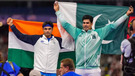

112695962.jpg


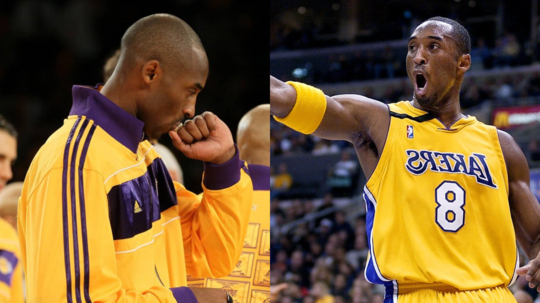

112669632.jpg


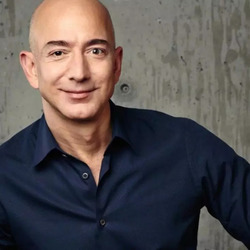

112644832.jpg


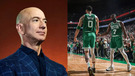

112641290.jpg


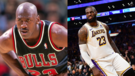

111530651.jpg


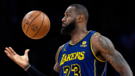

111192576.jpg


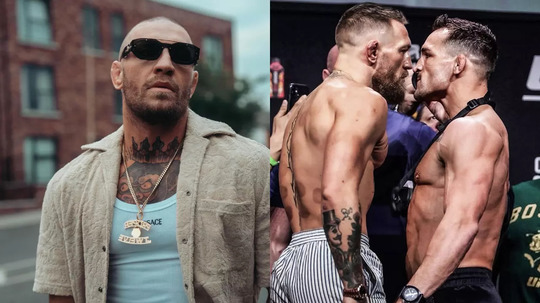

111060408.jpg


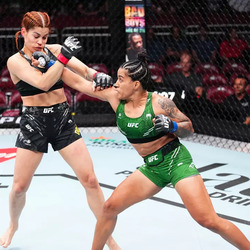

111025499.jpg


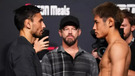

111001874.jpg


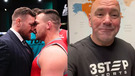

110012794.jpg


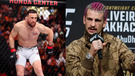

In [582]:
# images scraped from Time now sports section
import urllib.request
from PIL import Image
for ind, i in enumerate(imagelinks):
    imageName = i.split('/')[-1].split('?')[0]
    print(imageName)
    urllib.request.urlretrieve(i,
    f"C:\\Users\\asus\\Documents\\Python\\scrapedImages\\{imageName}")
    img = Image.open(f"C:\\Users\\asus\\Documents\\Python\\scrapedImages\\{imageName}")
    display(img)
# img.show()